<a href="https://colab.research.google.com/github/GerardoFesta/3DFER_SE4AI/blob/main/models/2DModels/2DCnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
from google.colab import drive
drive.mount("/content/drive")
import zipfile


Mounted at /content/drive


In [2]:
!pip install -q mlflow
!databricks configure --host https://community.cloud.databricks.com/

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 89.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.5/83.5 kB 11.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.1/148.1 kB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.0 MB/s eta 0:00:00
Username: gfesta24@gmail.com
Password: 
Repeat for confirmation: 


In [3]:
zip_ref = zipfile.ZipFile('drive/Shareddrives/Datasets SEFAI/fer2013.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall() #Extracts the files into the /tmp folder
zip_ref.close()

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#Questo commento serve per provare il funzionamento dei commit con colab

# **Dataset Loading**

In [6]:
train_dir = "train" # Directory containing the training data
test_dir = "test"  # Directory containing the validation data

# Define the transforms
train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.Grayscale(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5]),

])

test_transform = transforms.Compose([
    transforms.Grayscale(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

train_dataset = ImageFolder(train_dir, transform=train_transform)
test_dataset = ImageFolder(test_dir, transform=test_transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


# **Rete convolutiva**

In [7]:
def accuracy(preds, labels):
  probabilities = torch.nn.functional.softmax(preds, dim=1)
  _, predicted = torch.max(probabilities, 1)
  n_correct = (predicted==labels).sum().float()

  acc =n_correct / labels.shape[0]
  acc= torch.round(acc*100)
  return acc, n_correct;


In [8]:

class CNN(nn.Module):
    def __init__(self):

        super(CNN, self).__init__()


        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.relu2 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(2, 2)
        self.dropout1 = nn.Dropout(0.25)

        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        self.relu3 = nn.ReLU()
        self.conv4 = nn.Conv2d(128, 128, kernel_size=3, padding=1)
        self.bn4 = nn.BatchNorm2d(128)
        self.relu4 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(2, 2)
        self.dropout2 = nn.Dropout(0.25)

        self.conv5 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.bn5 = nn.BatchNorm2d(256)
        self.relu5 = nn.ReLU()

        self.conv6 = nn.Conv2d(256, 256, kernel_size=3, padding=1)
        self.bn6 = nn.BatchNorm2d(256)
        self.relu6 = nn.ReLU()
        self.pool3 = nn.MaxPool2d(2, 2)
        self.dropout3 = nn.Dropout(0.25)

        self.fc1 = nn.Linear(256 * 6 * 6, 256)

        self.bn7 = nn.BatchNorm1d(256)
        self.relu7 = nn.ReLU()

        self.dropout4 = nn.Dropout(0.5)

        self.fc2 = nn.Linear(256, 7)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu1(x)

        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu2(x)

        x = self.pool1(x)

        x = self.dropout1(x)
        #print("dropout1 ", x.shape)

        x = self.conv3(x)
        x = self.bn3(x)
        x = self.relu3(x)

        x = self.conv4(x)
        #print("conv4 ", x.shape)
        x = self.bn4(x)
        x = self.relu4(x)

        x = self.pool2(x)

        x = self.dropout2(x)


        x = self.conv5(x)
        x = self.bn5(x)
        x = self.relu5(x)

        x = self.conv6(x)
        #print("conv6 ", x.shape)
        x = self.bn6(x)
        x = self.relu6(x)

        x = self.pool3(x)
        x = self.dropout3(x)
        #print("dropout3 ", x.shape)
        x = x.view(-1, 256 * 6 * 6)
        #print(x.shape)
        x = self.fc1(x)
        x = self.bn7(x)
        x = self.relu7(x)
        x = self.dropout4(x)
        x = self.fc2(x)
        return x



In [ ]:
model = CNN()

criterion = nn.CrossEntropyLoss()

optimizer = optim.Adam(model.parameters(), lr=0.0001)

model.to(device)

CNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1): ReLU()
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu2): ReLU()
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout1): Dropout(p=0.25, inplace=False)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu3): ReLU()
  (conv4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu4): ReLU()
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout2): Dropout(p=0.25, inplace=

In [9]:
import mlflow
mlflow.set_tracking_uri("databricks")
mlflow.set_experiment("/Users/gfesta24@gmail.com/2DCnn")

<Experiment: artifact_location='dbfs:/databricks/mlflow-tracking/1645340172644810', creation_time=1687361115096, experiment_id='1645340172644810', last_update_time=1687943165954, lifecycle_stage='active', name='/Users/gfesta24@gmail.com/2DCnn', tags={'mlflow.experiment.sourceName': '/Users/gfesta24@gmail.com/2DCnn',
 'mlflow.experimentType': 'MLFLOW_EXPERIMENT',
 'mlflow.ownerEmail': 'gfesta24@gmail.com',
 'mlflow.ownerId': '1923923806180228'}>

In [ ]:
mlflow.start_run()

mlflow.set_tag("model_name", "2DCnn")
mlflow.log_param("lr", 0.001)
mlflow.log_param("batch_size", 64)

acc_list_train=[]
acc_list_test=[]
num_epochs = 100
best_loss = 1000
patience=3
counter = 0
stop = False

# Training loop
best_accuracy = 0.0

for epoch in range(num_epochs):
    print(counter)
    if stop:
      print(stop)
      break
    model.train()
    running_loss = 0.0
    total_correct = 0
    seen = 0
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        _, acc = accuracy(outputs, labels)
        total_correct += acc
        seen +=labels.shape[0]
        running_loss += loss.item()

    train_accuracy = total_correct / seen
    train_loss = running_loss / len(train_loader)
    print (f'Epoch [{epoch}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}, Acc: {total_correct/seen:.4f}')
    mlflow.log_metric("train_loss", train_loss, step=epoch)
    mlflow.log_metric("train_acc", train_accuracy, step=epoch)
    model.eval()

    total_correct = 0
    seen = 0
    running_loss = 0.0
    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item()
            _, acc = accuracy(outputs, labels)
            total_correct += acc
            seen +=labels.shape[0]

    test_accuracy = total_correct / seen
    test_loss = running_loss / len(test_loader)
    print("Test acc: ", test_accuracy)
    print("Test loss: ", test_loss)
    mlflow.log_metric("test_acc", test_accuracy, step=epoch)
    mlflow.log_metric("test_loss", test_loss, step=epoch)

    if test_loss < best_loss:
          print("MIGLIORATO")
          torch.save(model.state_dict(), 'model_weights.pth')
          best_loss = test_loss
          best_model_train_acc=train_accuracy
          best_model_test_acc=test_accuracy
          best_model_test_loss=test_loss
          best_model_train_loss=running_loss / len(train_loader)
          counter = 0
          # Salva i pesi del modello se la validation loss è migliorata
          torch.save(model.state_dict(), 'best_model.pt')
    else:
        counter += 1
        # Verifica se raggiunto il criterio di early stopping
        if counter >= patience:
              print(f'Early stopping at epoch {epoch+1}')
              mlflow.set_tag("Epochs_stopped", epoch+1)
              mlflow.log_artifact("best_model.pt")
              mlflow.log_metric("best_test_acc", best_model_test_acc)
              mlflow.log_metric("best_test_loss", best_model_test_loss)
              mlflow.log_metric("best_train_acc", best_model_train_acc)
              mlflow.log_metric("best_train_loss", best_model_train_loss)
              mlflow.end_run()
              stop=True
    print("BEST TEST LOSS: ", best_loss)

    print(f"Epoch {epoch+1}/{50}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}, Test Loss: {test_loss:.4f}")


0
Epoch [0/100], Loss: 1.7801, Acc: 0.2896
Test acc:  tensor(0.3534, device='cuda:0')
Test loss:  1.6376861676705623
MIGLIORATO
BEST TEST LOSS:  1.6376861676705623
Epoch 1/50, Train Loss: 1.7801, Train Accuracy: 0.2896, Test Accuracy: 0.3534, Test Loss: 1.6377
0
Epoch [1/100], Loss: 1.5701, Acc: 0.3909
Test acc:  tensor(0.4369, device='cuda:0')
Test loss:  1.4607492716966477
MIGLIORATO
BEST TEST LOSS:  1.4607492716966477
Epoch 2/50, Train Loss: 1.5701, Train Accuracy: 0.3909, Test Accuracy: 0.4369, Test Loss: 1.4607
0
Epoch [2/100], Loss: 1.4577, Acc: 0.4425
Test acc:  tensor(0.4716, device='cuda:0')
Test loss:  1.3817282582806274
MIGLIORATO
BEST TEST LOSS:  1.3817282582806274
Epoch 3/50, Train Loss: 1.4577, Train Accuracy: 0.4425, Test Accuracy: 0.4716, Test Loss: 1.3817
0
Epoch [3/100], Loss: 1.3857, Acc: 0.4732
Test acc:  tensor(0.4985, device='cuda:0')
Test loss:  1.2935475018699611
MIGLIORATO
BEST TEST LOSS:  1.2935475018699611
Epoch 4/50, Train Loss: 1.3857, Train Accuracy: 0.473

In [10]:
def get_artifact_with_lowest_metric(experiment_id, metric_name, artifact_name):
    runs = mlflow.search_runs(experiment_ids=[experiment_id]).sort_values(f"{metric_name}")
    lowest_metric_run = runs.iloc[0]

    run_id = lowest_metric_run.run_id
    artifact_uri = mlflow.get_artifact_uri(run_id)

    artifact_path = f"{artifact_uri}/{artifact_name}"
    return run_id, artifact_path

# Specifica l'ID del tuo esperimento e i nomi delle metrica e dell'artefatto
experiment_id = '1645340172644810'
metric_name = 'metrics.best_test_loss'
artifact_name = 'model_weights'

run_id, artifact_path = get_artifact_with_lowest_metric(experiment_id, metric_name, artifact_name)

print("Artifatto 'model_weights' nella run con la metrica 'best_test_acc' più bassa:")
print(artifact_path)

Artifatto 'model_weights' nella run con la metrica 'best_test_acc' più bassa:
dbfs:/databricks/mlflow-tracking/1645340172644810/c0343fa3353147fb9e8d8c02684e90ec/artifacts/7f118b67a1514abba7e759ce4ffd3fe8/model_weights


In [11]:
mlflow.artifacts.download_artifacts(run_id=run_id, dst_path="/content/artefatto")

'/content/artefatto/'

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
import matplotlib.pyplot as plt

model = CNN()
model.load_state_dict(torch.load("/content/artefatto/best_model.pt"))
model.eval()
model.to(device)



# Calcola le metriche sul test dataset
model.eval()  # Imposta il modello in modalità di valutazione (non addestramento)
test_predictions = []
test_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        print(images.shape)
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predictions = torch.max(torch.nn.functional.softmax(outputs, dim=1), 1)
        test_predictions.extend(predictions.cpu().numpy())
        test_labels.extend(labels.cpu().numpy())


accuracy = accuracy_score(test_labels, test_predictions)
precision = precision_score(test_labels, test_predictions, average=None)
recall = recall_score(test_labels, test_predictions, average=None)
f1 = f1_score(test_labels, test_predictions, average=None)
#auc_roc = roc_auc_score(test_labels, test_predictions, multi_class='ovr')
classification_rep = classification_report(test_labels, test_predictions)

print("Test Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("F1 Score:", f1)
#print("AUC-ROC:", auc_roc)
print("Classification Report:\n", classification_rep)

# Lista delle etichette delle classi
#class_labels = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6']
class_labels=[9,9,9,9,9,9,9]
for label in ["angry", "disgust", "fear", "happy", "neutral", "sad", "surprise"]:
  class_labels[train_dataset.class_to_idx[label]]=label




# Crea il grafico a barre per la precisione
plt.figure(figsize=(10, 6))
plt.bar(class_labels, precision)
plt.title('Precision per Class')
plt.xlabel('Class')
plt.ylabel('Precision')
plt.xticks(rotation=45)
plt.show()

# Crea il grafico a barre per il recall
plt.figure(figsize=(10, 6))
plt.bar(class_labels, recall)
plt.title('Recall per Class')
plt.xlabel('Class')
plt.ylabel('Recall')
plt.xticks(rotation=45)
plt.show()

# Crea il grafico a barre per l'F1-score
plt.figure(figsize=(10, 6))
plt.bar(class_labels, f1)
plt.title('F1 Score per Class')
plt.xlabel('Class')
plt.ylabel('F1 Score')
plt.xticks(rotation=45)
plt.show()

In [ ]:
writer.close()

In [14]:
!pip install grad-cam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 14.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for grad-cam: filename=grad_cam-1.4.8-py3-none-any.whl size=38247 sha256=75aa00bcd401123e74b0e53d5a3fb72337774565aa13166b60f8b91d0e4f5d55
  Stored in directory: /root/.cache/pip/wheels/f8/04/36/94ff3c8a4215826a21946b34c01180817e606989fdf53f7cd6
Successfully built grad-cam


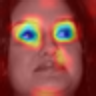

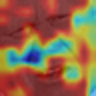

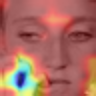

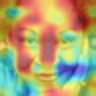

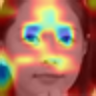

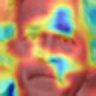

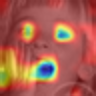

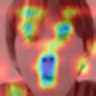

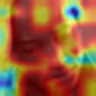

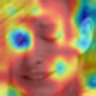

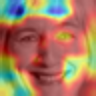

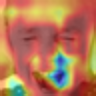

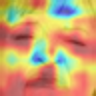

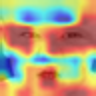

In [50]:
!pip install pillow
import numpy as np
from PIL import Image
import cv2
from pytorch_grad_cam import GradCAM, HiResCAM, ScoreCAM, GradCAMPlusPlus, AblationCAM, XGradCAM, EigenCAM, FullGrad
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image
from google.colab.patches import cv2_imshow
from skimage.transform import resize

target_layers = [model.conv6]

# Percorsi delle immagini di input
input_image_paths = [
    '/content/test/angry/PrivateTest_12766285.jpg',
    '/content/test/disgust/PrivateTest_34013087.jpg',
    '/content/test/fear/PrivateTest_11014592.jpg',
    '/content/test/happy/PrivateTest_1533232.jpg',
    '/content/test/neutral/PrivateTest_11724564.jpg',
    '/content/test/sad/PrivateTest_13437169.jpg',
    '/content/test/surprise/PrivateTest_14522193.jpg',
    '/content/test/surprise/PublicTest_10709121.jpg',
    '/content/test/sad/PrivateTest_77462938.jpg',
    '/content/test/neutral/PrivateTest_74313024.jpg',
    '/content/test/happy/PrivateTest_52544508.jpg',
    '/content/test/fear/PrivateTest_72173710.jpg',
    '/content/test/disgust/PublicTest_86861373.jpg',
    '/content/test/angry/PrivateTest_56252993.jpg'
]

# Creazione di una lista per contenere le immagini elaborate
visualizations = []

for input_image_path in input_image_paths:
    input_image = Image.open(input_image_path)
    transform = transforms.Compose([
        transforms.Grayscale(),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5], std=[0.5])
    ])

    input_tensor = transform(input_image).unsqueeze(0)

    immagine = cv2.imread(input_image_path)
    input_image = immagine.astype(np.float32) / 255.0

    # Costruzione dell'oggetto CAM una volta sola e riutilizzo sulle immagini successive
    cam = GradCAM(model=model, target_layers=target_layers, use_cuda=True)

    targets = [ClassifierOutputTarget(6)]

    grayscale_cam = cam(input_tensor=input_tensor, targets=targets)
    grayscale_cam = grayscale_cam[0, :]

    visualization = show_cam_on_image(input_image, grayscale_cam, use_rgb=True)

    # Upscaling dell'immagine
    upscaled_image = resize(visualization, (2 * input_image.shape[1], 2 * input_image.shape[0]), preserve_range=True)

    visualizations.append(upscaled_image)


    #visualization = show_cam_on_image(input_image, grayscale_cam, use_rgb=True)
    #visualizations.append(visualization)
    cv2_imshow(upscaled_image)
